In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries required to load the data
import zipfile
import os
from PIL import Image

# Basics
import numpy as np
import pandas as pd

#Data Vizualizaiton
import matplotlib.pyplot as plt
import seaborn as sns

#Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow


In [ ]:
# Storing the path of the data file from the Google drive
path = "/content/drive/MyDrive/cell_images"


In [ ]:

# Storing the path of the extracted "train" folder
train_dir = '/content/drive/MyDrive/cell_images/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []


In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:

# Storing the path of the extracted "test" folder
test_dir = '/content/drive/MyDrive/cell_images/cell_images/train'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []


In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [ ]:
# Shape of images
print('Shape of train images: ', train_images.shape)
print('Shape of test images: ', test_images.shape)



Shape of train images:  (24982, 64, 64, 3)
Shape of test images:  (24982, 64, 64, 3)


In [ ]:

# Shape of labels
print('Shape of train labels: ', train_labels.shape)
print('Shape of test labels: ', test_labels.shape)

Shape of train labels:  (24982,)
Shape of test labels:  (24982,)


In [ ]:
from tables.tests.test_suite import test
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

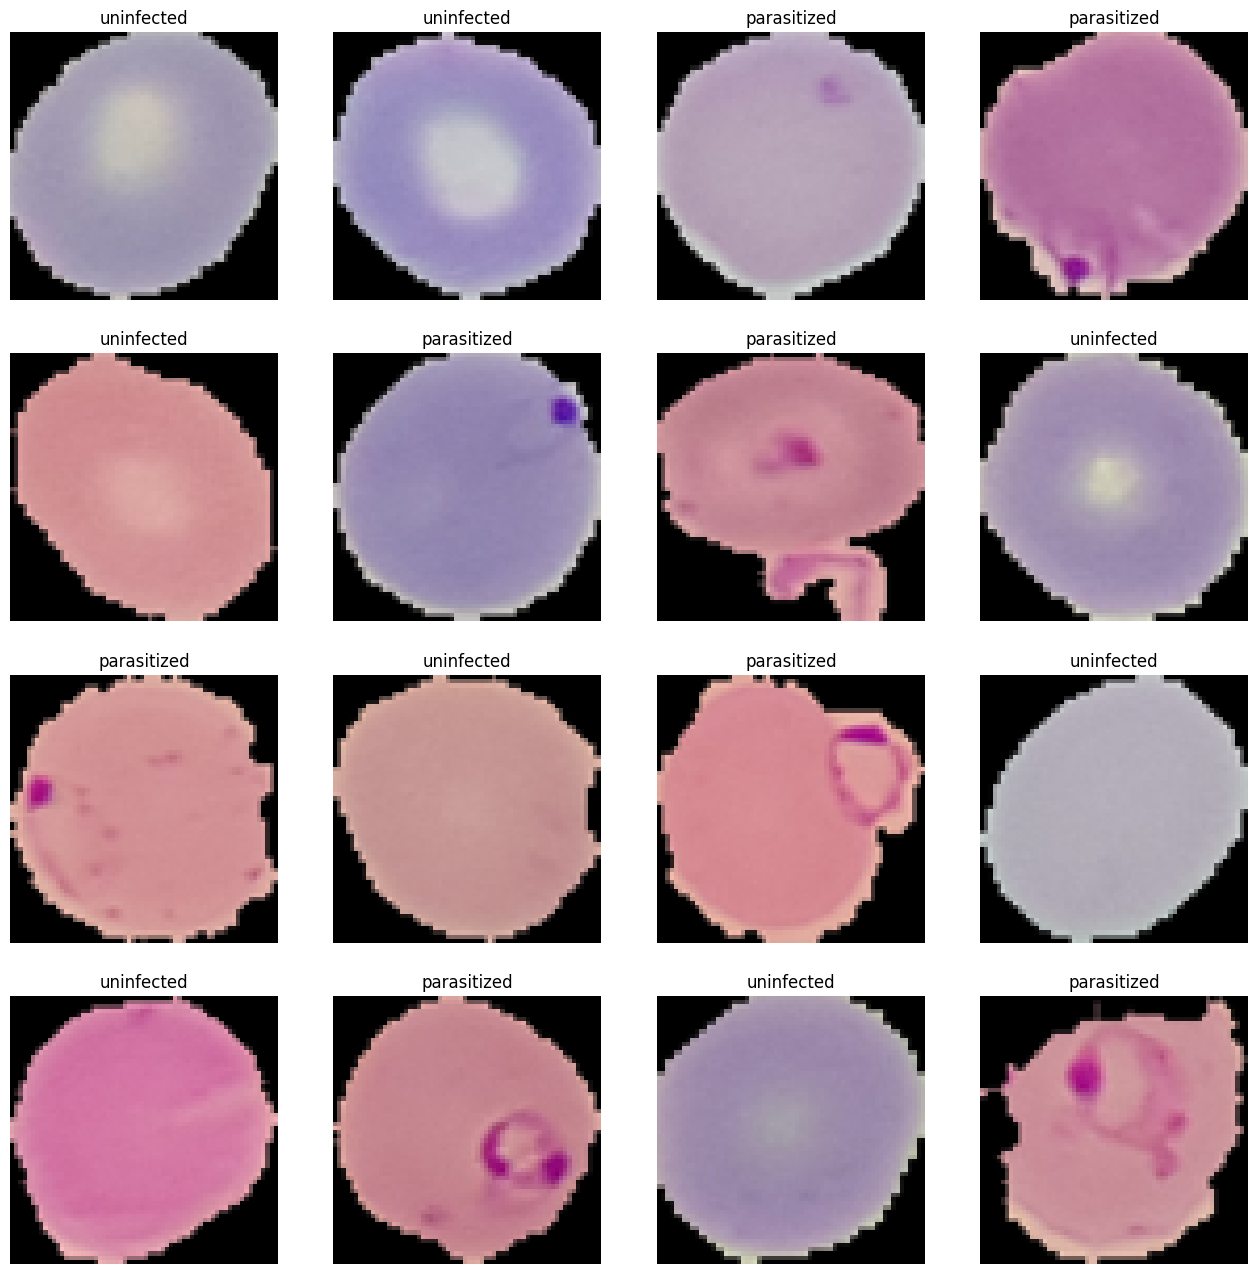

In [ ]:

np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

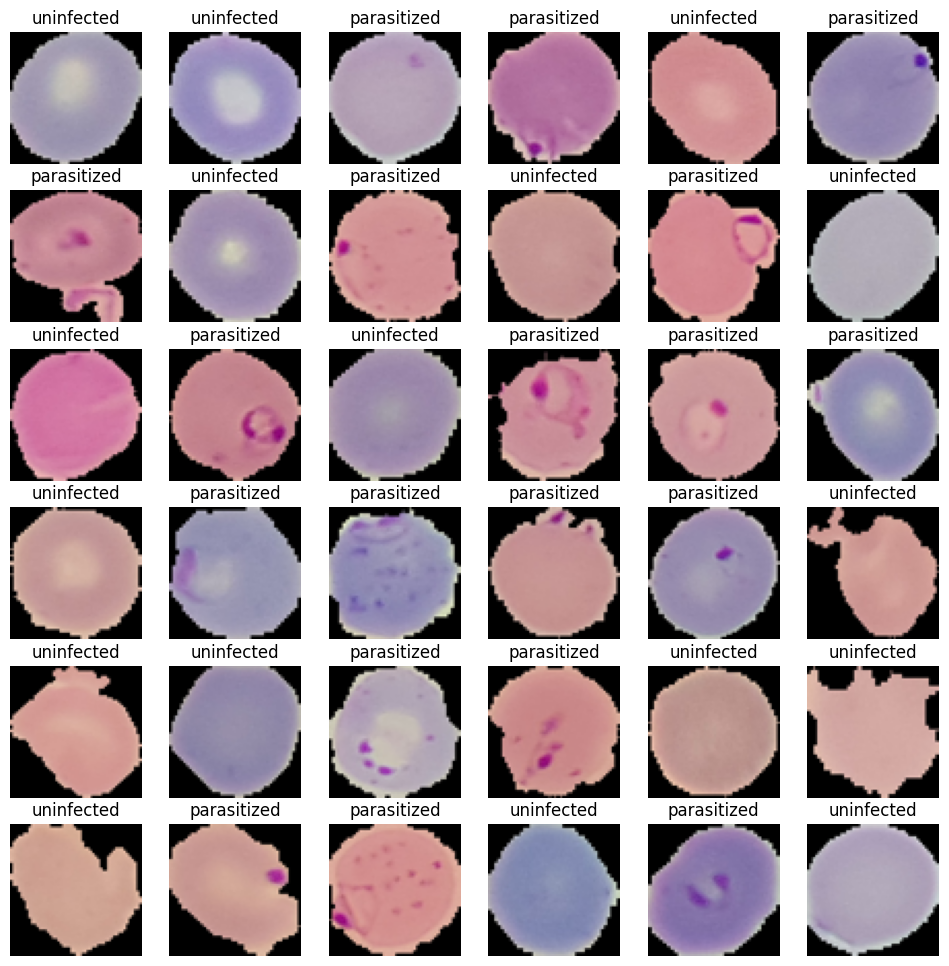

In [ ]:
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')



In [ ]:
import cv2

trainimage=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  newimagetrain = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  trainimage.append(newimagetrain)

trainimage = np.array(trainimage)

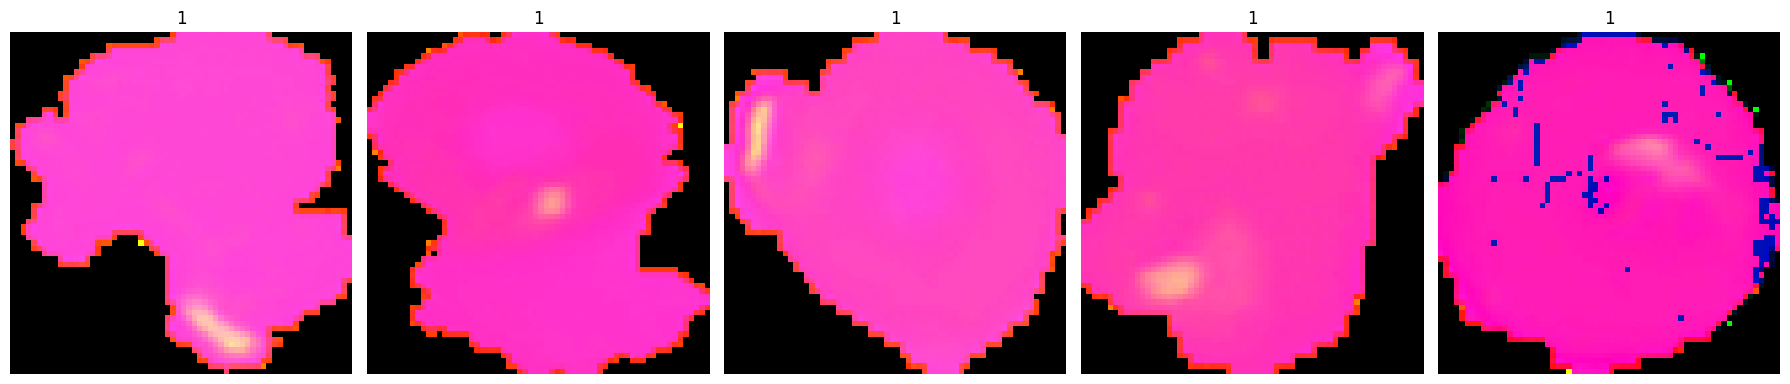

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(trainimage[i])

  ax[t].set_axis_off()

  fig.tight_layout()


In [ ]:
import cv2

testimage=[]   # to hold the HSV image array change to gfy to have a separate location for the test images

for i in np.arange(0, 100, 1):

  testimagenew = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  testimage.append(testimagenew)

testimage = np.array(testimage)

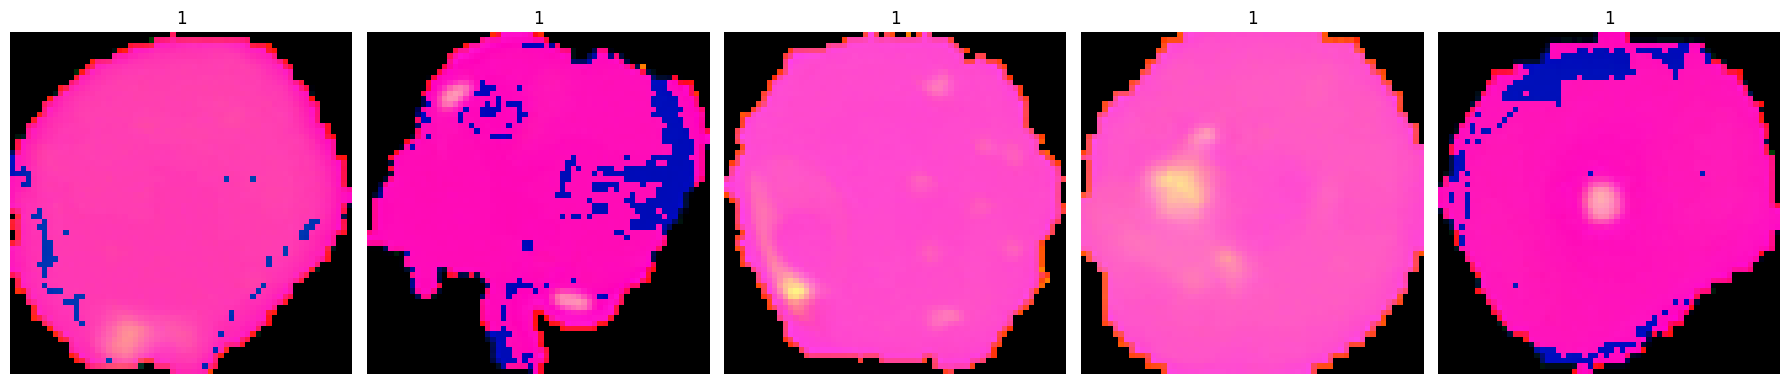

In [ ]:

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(testimage[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

train_labels


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:

# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Creating sequential model
model = Sequential()

#Layer 1
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

#Layer 2
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

#Layer 3
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 1.99),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [ ]:


history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 40, verbose = 1)


Epoch 1/40
625/625 [==============================] - 122s 192ms/step - loss: 0.3769 - accuracy: 0.8267 - val_loss: 0.0927 - val_accuracy: 0.9734
Epoch 2/40
625/625 [==============================] - 113s 180ms/step - loss: 0.1289 - accuracy: 0.9557 - val_loss: 0.1121 - val_accuracy: 0.9904
Epoch 3/40
625/625 [==============================] - 115s 183ms/step - loss: 0.0997 - accuracy: 0.9666 - val_loss: 0.0719 - val_accuracy: 0.9880
Epoch 4/40
625/625 [==============================] - 117s 188ms/step - loss: 0.0806 - accuracy: 0.9726 - val_loss: 0.0363 - val_accuracy: 0.9926
Epoch 5/40
625/625 [==============================] - 136s 218ms/step - loss: 0.0739 - accuracy: 0.9744 - val_loss: 0.0766 - val_accuracy: 0.9826
Epoch 6/40
625/625 [==============================] - 118s 189ms/step - loss: 0.0717 - accuracy: 0.9753 - val_loss: 0.0585 - val_accuracy: 0.9862


In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

781/781 [==============================] - 36s 46ms/step - loss: 0.0434 - accuracy: 0.9862

 Test_Accuracy:- 0.9861500263214111


781/781 [==============================] - 46s 58ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12380
           1       0.98      0.98      0.98     12602

    accuracy                           0.98     24982
   macro avg       0.98      0.98      0.98     24982
weighted avg       0.98      0.98      0.98     24982



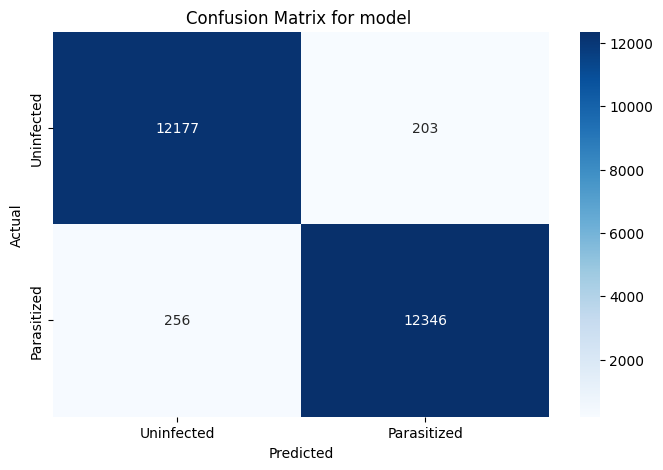

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(test_labels,axis=1)
print(classification_report(y_true,pred))
cm = confusion_matrix(y_true,pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm,annot=True,fmt='.0f',xticklabels=['Uninfected','Parasitized'],yticklabels=['Uninfected','Parasitized'],cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for model ')
plt.show()

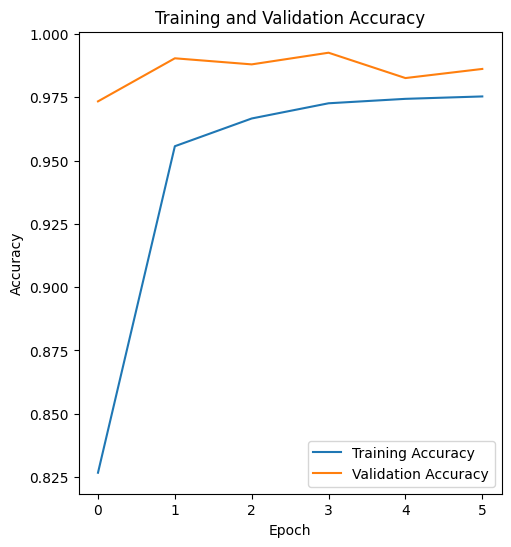

In [ ]:
def plot_metrics(history):
  #Set figure size
  plt.figure(figsize=(12,6))

  #Plot training and validation accuracy
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

plot_metrics(history)

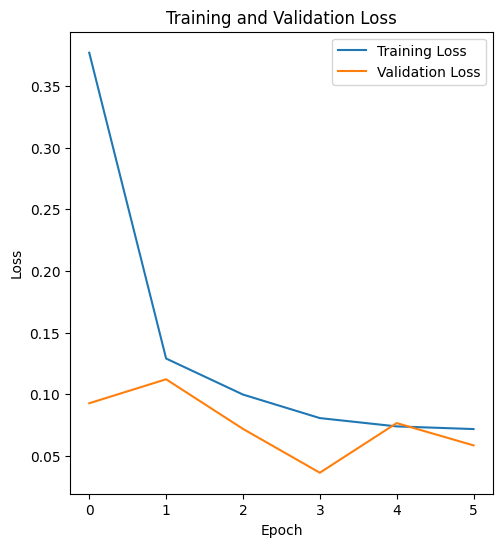

In [ ]:
def plot_metrics(history):
  #Set figure size
  plt.figure(figsize=(12,6))



  plt.subplot(1,2,1)
  plt.plot(history.history['loss'],label='Training Loss')
  plt.plot(history.history['val_loss'],label = 'Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

plot_metrics(history)

In [ ]:
backend.clear_session() # Clearing the backend for new model


In [ ]:

# Creating sequential model
model_1 = Sequential()

#Layer 1
model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

#Layer 2
model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

#Layer 3
model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Flatten())
model_1.add(Dense(512, activation = "relu"))
model_1.add(Dropout(0.4))
model_1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [ ]:


history = model_1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 40, verbose = 1)

Epoch 1/40
625/625 [==============================] - 80s 124ms/step - loss: 0.4651 - accuracy: 0.7706 - val_loss: 0.1556 - val_accuracy: 0.9780
Epoch 2/40
625/625 [==============================] - 76s 121ms/step - loss: 0.1223 - accuracy: 0.9591 - val_loss: 0.0996 - val_accuracy: 0.9902
Epoch 3/40
625/625 [==============================] - 74s 119ms/step - loss: 0.0919 - accuracy: 0.9703 - val_loss: 0.0652 - val_accuracy: 0.9890
Epoch 4/40
625/625 [==============================] - 76s 121ms/step - loss: 0.0801 - accuracy: 0.9730 - val_loss: 0.0413 - val_accuracy: 0.9956
Epoch 5/40
625/625 [==============================] - 76s 121ms/step - loss: 0.0802 - accuracy: 0.9733 - val_loss: 0.0904 - val_accuracy: 0.9846
Epoch 6/40
625/625 [==============================] - 73s 116ms/step - loss: 0.0740 - accuracy: 0.9751 - val_loss: 0.0735 - val_accuracy: 0.9818


In [ ]:

accuracy = model_1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

In [ ]:
backend.clear_session() # Clearing the backend for new model


In [ ]:
# Creating sequential model
model_2 = Sequential()


#Layer 1
model_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_2.add(MaxPooling2D(pool_size = 2))
model_2.add(Dropout(0.2))

#Layer 2
model_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model_2.add(MaxPooling2D(pool_size = 2))
model_2.add(Dropout(0.2))

#Layer 3
model_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model_2.add(MaxPooling2D(pool_size = 2))
model_2.add(Dropout(0.2))

#Layer 4 (new)
model_2.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model_2.add(MaxPooling2D(pool_size = 2))
model_2.add(Dropout(0.2))

model_2.add(Flatten())
model_2.add(Dense(512, activation = "relu"))
model_2.add(Dropout(0.4))
model_2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 1.96),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history = model_2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 40, verbose = 1)


Epoch 1/40
625/625 [==============================] - 138s 218ms/step - loss: 0.4585 - accuracy: 0.7610 - val_loss: 0.0707 - val_accuracy: 0.9960
Epoch 2/40
625/625 [==============================] - 124s 198ms/step - loss: 0.1081 - accuracy: 0.9627 - val_loss: 0.0523 - val_accuracy: 0.9918
Epoch 3/40
625/625 [==============================] - 138s 220ms/step - loss: 0.0940 - accuracy: 0.9676 - val_loss: 0.0480 - val_accuracy: 0.9888
Epoch 4/40
625/625 [==============================] - 119s 191ms/step - loss: 0.0842 - accuracy: 0.9717 - val_loss: 0.0303 - val_accuracy: 0.9924
Epoch 5/40
625/625 [==============================] - 119s 190ms/step - loss: 0.0800 - accuracy: 0.9741 - val_loss: 0.0718 - val_accuracy: 0.9804
Epoch 6/40
625/625 [==============================] - 115s 185ms/step - loss: 0.0766 - accuracy: 0.9730 - val_loss: 0.0506 - val_accuracy: 0.9860


In [ ]:
accuracy = model_2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

781/781 [==============================] - 36s 46ms/step - loss: 0.0524 - accuracy: 0.9819

 Test_Accuracy:- 0.9819470047950745


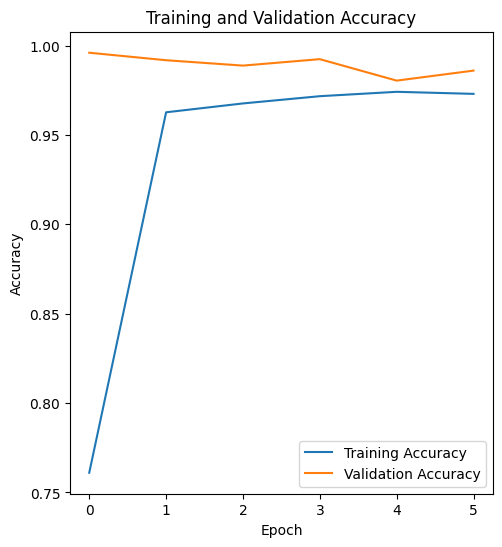

In [ ]:
def plot_metrics(history):
  #Set figure size
  plt.figure(figsize=(12,6))

  #Plot training and validation accuracy
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

plot_metrics(history)

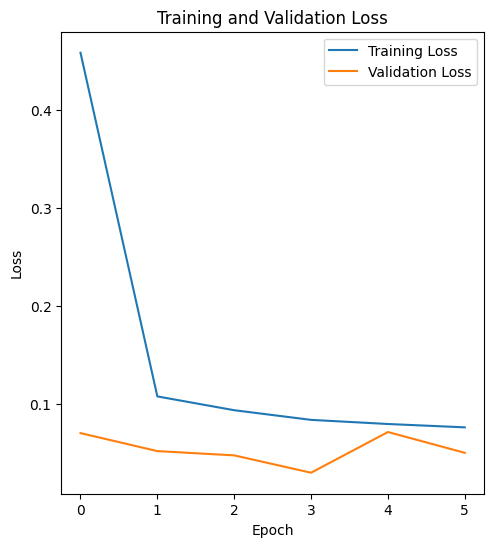

In [ ]:
def plot_metrics(history):
  #Set figure size
  plt.figure(figsize=(12,6))



  plt.subplot(1,2,1)
  plt.plot(history.history['loss'],label='Training Loss')
  plt.plot(history.history['val_loss'],label = 'Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

plot_metrics(history)

781/781 [==============================] - 36s 45ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12380
           1       0.98      0.98      0.98     12602

    accuracy                           0.98     24982
   macro avg       0.98      0.98      0.98     24982
weighted avg       0.98      0.98      0.98     24982



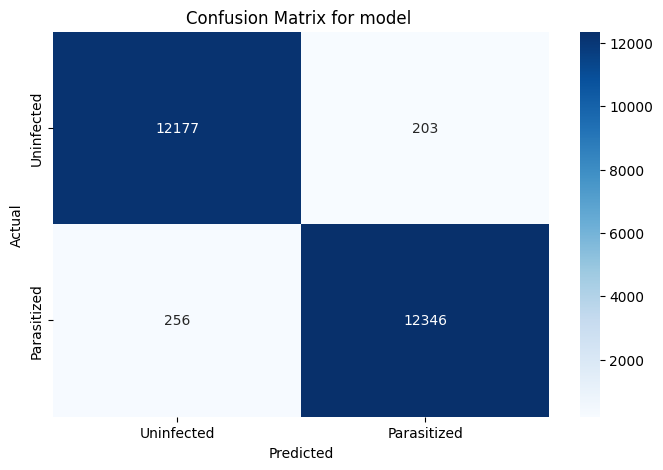

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(test_labels,axis=1)
print(classification_report(y_true,pred))
cm = confusion_matrix(y_true,pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm,annot=True,fmt='.0f',xticklabels=['Uninfected','Parasitized'],yticklabels=['Uninfected','Parasitized'],cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for model ')
plt.show()

In [ ]:
backend.clear_session() # Clearing the backend for new model


In [ ]:
# Creating sequential model
model_3 = Sequential()

#Layer 1
model_3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model_3.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_3.add(MaxPooling2D(pool_size = 2))
model_3.add(Dropout(0.2))

#Layer 2
model_3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model_3.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_3.add(MaxPooling2D(pool_size = 2))
model_3.add(Dropout(0.2))

model_3.add(BatchNormalization()) #Add batch normalization

#Layer 3
model_3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model_3.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_3.add(MaxPooling2D(pool_size = 2))
model_3.add(Dropout(0.2))

model_3.add(BatchNormalization()) #Add batch normalization

#Layer 4
model_3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model_3.add(MaxPooling2D(pool_size = 2))
model_3.add(Dropout(0.2))

model_3.add(BatchNormalization()) #Add batch normalization

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_3.add(Dropout(0.4))
model_3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                        

In [ ]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2.23),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history = model_3.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 40, verbose = 1)


Epoch 1/40
625/625 [==============================] - 142s 222ms/step - loss: 0.6842 - accuracy: 0.6280 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 2/40
625/625 [==============================] - 136s 218ms/step - loss: 0.3466 - accuracy: 0.8394 - val_loss: 0.0250 - val_accuracy: 0.9982
Epoch 3/40
625/625 [==============================] - 137s 219ms/step - loss: 0.1235 - accuracy: 0.9578 - val_loss: 0.0530 - val_accuracy: 0.9926
Epoch 4/40
625/625 [==============================] - 140s 224ms/step - loss: 0.1069 - accuracy: 0.9660 - val_loss: 0.0247 - val_accuracy: 0.9950
Epoch 5/40
625/625 [==============================] - 137s 219ms/step - loss: 0.0916 - accuracy: 0.9704 - val_loss: 0.0517 - val_accuracy: 0.9912
Epoch 6/40
625/625 [==============================] - 136s 218ms/step - loss: 0.0960 - accuracy: 0.9697 - val_loss: 0.0414 - val_accuracy: 0.9924
Epoch 7/40
625/625 [==============================] - 140s 223ms/step - loss: 0.0857 - accuracy: 0.9716 - val_loss: 0.0424 -

In [ ]:
accuracy = model_3.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

781/781 [==============================] - 48s 61ms/step - loss: 0.0423 - accuracy: 0.9858

 Test_Accuracy:- 0.9857897758483887


781/781 [==============================] - 36s 46ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12380
           1       0.98      0.98      0.98     12602

    accuracy                           0.98     24982
   macro avg       0.98      0.98      0.98     24982
weighted avg       0.98      0.98      0.98     24982



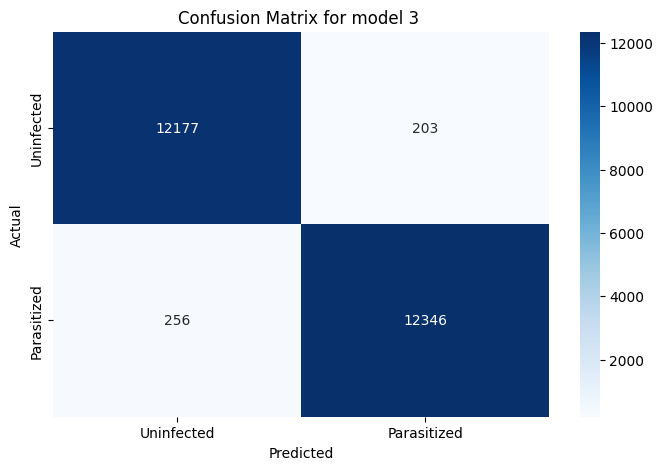

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(test_labels,axis=1)
print(classification_report(y_true,pred))
cm = confusion_matrix(y_true,pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm,annot=True,fmt='.0f',xticklabels=['Uninfected','Parasitized'],yticklabels=['Uninfected','Parasitized'],cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for model 3 ')
plt.show()

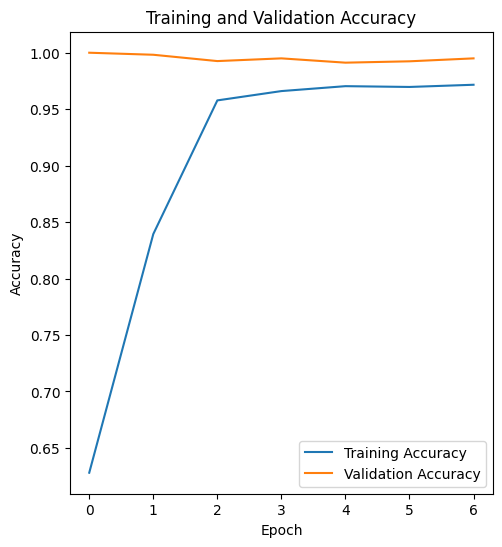

In [ ]:
def plot_metrics(history):
  #Set figure size
  plt.figure(figsize=(12,6))

  #Plot training and validation accuracy
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

plot_metrics(history)

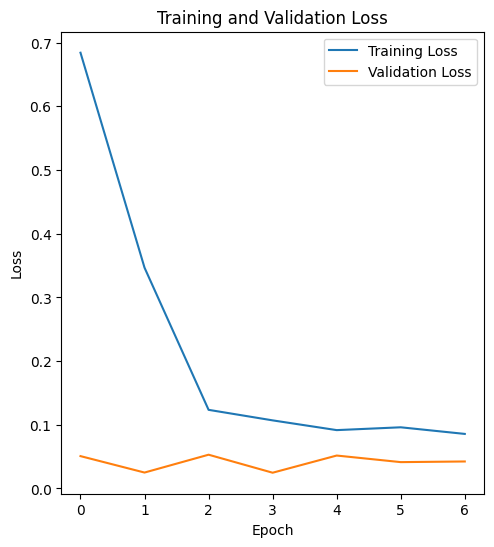

In [ ]:
def plot_metrics(history):
  #Set figure size
  plt.figure(figsize=(12,6))



  plt.subplot(1,2,1)
  plt.plot(history.history['loss'],label='Training Loss')
  plt.plot(history.history['val_loss'],label = 'Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

plot_metrics(history)

In [ ]:

backend.clear_session()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
# Added vertical flipping, noise, lighting conditions, perspective transformation
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip	= True,
                                   zca_whitening = True,
                                  zoom_range = 0.5,shear_range = 0.2,
                                   channel_shift_range=0.8)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)


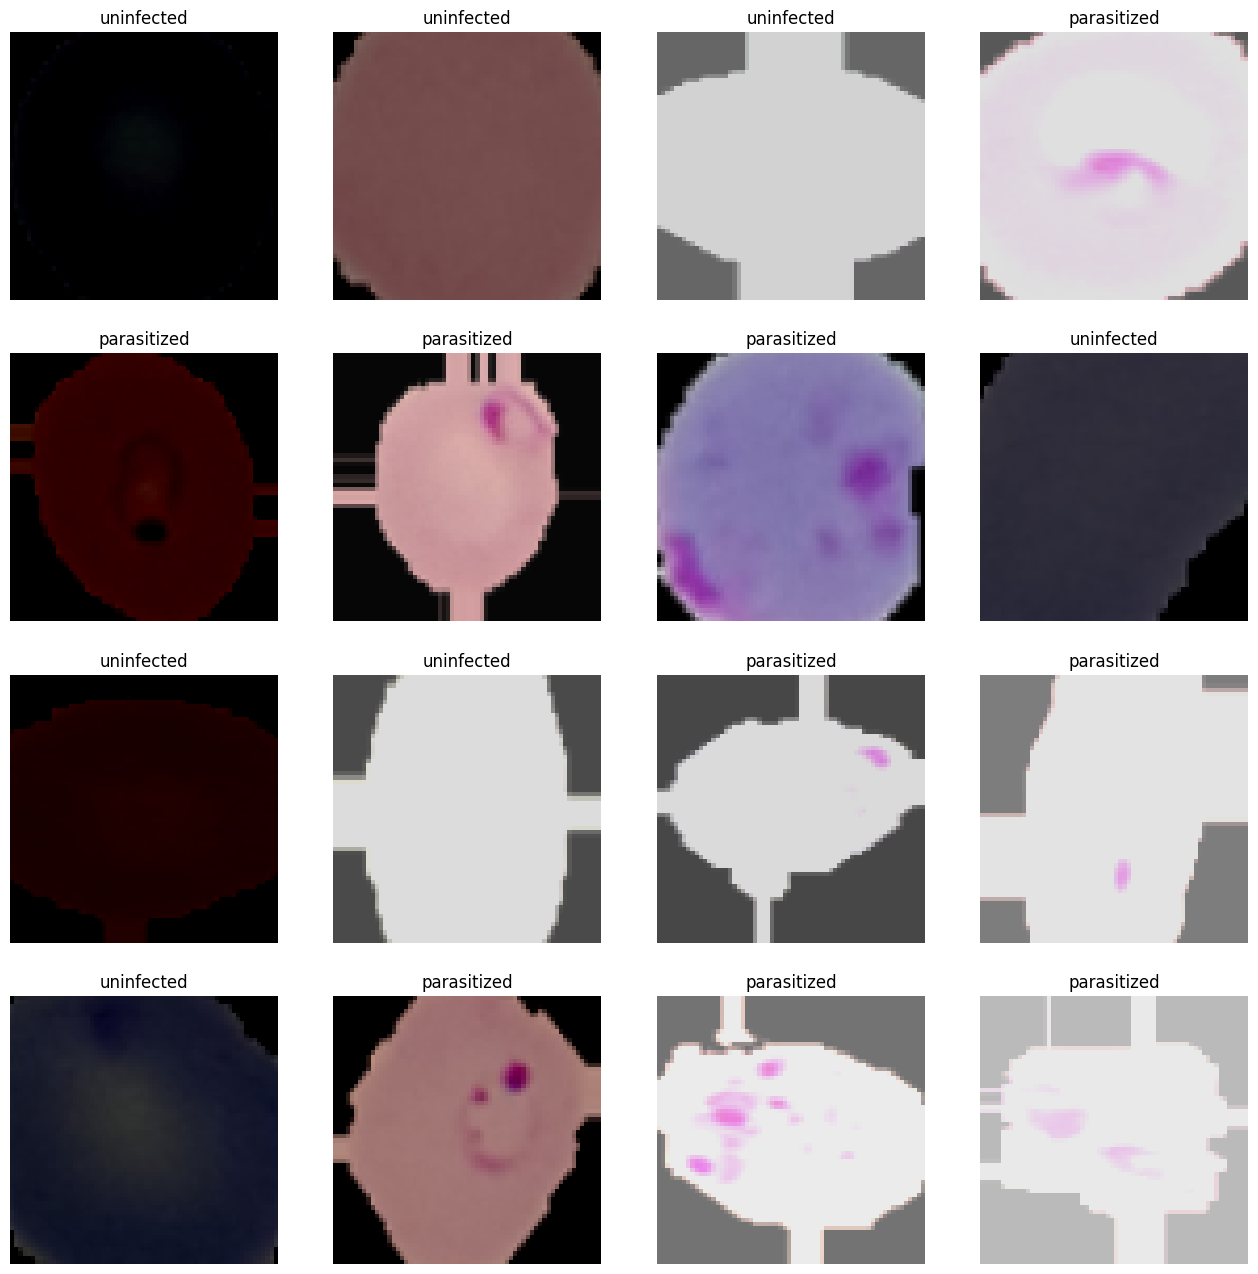

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

In [ ]:
model_4 = Sequential()

# Build the model here
# Using same architechture as model_3 as that is what performed the best
#Layer 1


In [ ]:
# Creating sequential model
model_4 = Sequential()

#Layer 1
model_4.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model_4.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_4.add(MaxPooling2D(pool_size = 2))
model_4.add(Dropout(0.2))

#Layer 2
model_4.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model_4.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_4.add(MaxPooling2D(pool_size = 2))
model_4.add(Dropout(0.2))

model_4.add(BatchNormalization()) #Add batch normalization

#Layer 3
model_4.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model_4.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_4.add(MaxPooling2D(pool_size = 2))
model_4.add(Dropout(0.2))

model_4.add(BatchNormalization()) #Add batch normalization

#Layer 4
model_4.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model_4.add(MaxPooling2D(pool_size = 2))
model_4.add(Dropout(0.2))

model_4.add(BatchNormalization()) #Add batch normalization

model_4.add(Flatten())
model_4.add(Dense(512))
model_4.add(LeakyReLU(0.1)) #change to LeakyRelu slope = 0.1
model_4.add(Dropout(0.4))
model_4.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                      

In [ ]:
model_4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2.23),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [ ]:
history3 = model_4.fit(train_generator,validation_data = val_generator,batch_size = 32, callbacks = callbacks,epochs = 40,verbose=1)

Epoch 1/40


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


313/313 [==============================] - 174s 557ms/step - loss: 0.3423 - accuracy: 0.8369 - val_loss: 0.1073 - val_accuracy: 0.9684
Epoch 2/40
313/313 [==============================] - 163s 522ms/step - loss: 0.3404 - accuracy: 0.8363 - val_loss: 0.1224 - val_accuracy: 0.9608
Epoch 3/40
313/313 [==============================] - 169s 538ms/step - loss: 0.3393 - accuracy: 0.8363 - val_loss: 0.1093 - val_accuracy: 0.9644
Epoch 4/40
313/313 [==============================] - 164s 523ms/step - loss: 0.3349 - accuracy: 0.8391 - val_loss: 0.1303 - val_accuracy: 0.9588


In [ ]:
accuracy3 = model_4.evaluate(test_images,test_labels,verbose=1)
print('\n','Test Accuracy:-',accuracy3[1])

781/781 [==============================] - 47s 60ms/step - loss: 0.1307 - accuracy: 0.9605

 Test Accuracy:- 0.9605315923690796


In [ ]:

# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False , weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:


transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model_5 = Model(vgg.input, pred) # Initializing the model

In [ ]:
# Compiling the model
model_5.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),

              metrics = ['accuracy'])

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2.23),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [ ]:

history4 = model_5.fit(
            train_images, train_labels,
            epochs = 40,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/40
625/625 [==============================] - 1289s 2s/step - loss: 0.2335 - accuracy: 0.9051 - val_loss: 0.1455 - val_accuracy: 0.9606
Epoch 2/40
625/625 [==============================] - 1303s 2s/step - loss: 0.1853 - accuracy: 0.9259 - val_loss: 0.1964 - val_accuracy: 0.9236
Epoch 3/40
 10/625 [..............................] - ETA: 17:13 - loss: 0.1717 - accuracy: 0.9250

In [ ]:
# Evaluating the model on test data
accuracy = model_5.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])


In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Model

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

resnet.summary()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Model

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

transfer_layer = resnet.get_layer('conv5_block3_out')
resnet.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)

x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

pred = Dense(2, activation='softmax')(x)

model_6 = Model(resnet.input, pred)

In [ ]:
# Compiling the model
model_6.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),

              metrics = ['accuracy'])

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2.23),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history5 = model_6.fit(
            train_images, train_labels,
            epochs = 40,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

In [ ]:
	# Evaluating the model on test data
accuracy = model_6.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])


**This portion is now for Inception-V3**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the InceptionV3 model
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(75, 75, 3))

# Freeze the layers in the model
for layer in inception.layers:
    layer.trainable = False

# Add a global average pooling layer
x = GlobalAveragePooling2D()(inception.output)

# Add a dense layer with 256 neurons and ReLU activation
x = Dense(256, activation='relu')(x)

# Add a dropout layer
x = Dropout(0.5)(x)

# Add a final dense layer with 2 neurons and softmax activation
predictions = Dense(2, activation='softmax')(x)

# Create the model
model_inception = Model(inputs=inception.input, outputs=predictions)

# Compile the model
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model_inception.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 37, 37, 32)  96          ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation (Activation)     

In [ ]:
# Compiling the model
inception.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),

              metrics = ['accuracy'])

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2.23),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:

history4 = inception.fit(
            train_images, train_labels,
            epochs = 40,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)